In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [42]:
X, y = load_iris(return_X_y = True, as_frame = True)
X = X.astype('float32')

y.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [44]:
x_train = x_train.astype('float')

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 22 to 102
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [46]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
x_test[:,].max()

2.5486615

In [72]:
clf = LogisticRegression(class_weight = {0:5,1:1,2:2})

In [73]:
clf.fit(x_train, y_train)

LogisticRegression(class_weight={0: 5, 1: 1, 2: 2})

In [74]:
from sklearn import metrics

In [75]:
y_pred = clf.predict(x_test)

In [76]:
clf.score(x_train, y_train), clf.score(x_test, y_test)

(0.9666666666666667, 0.9666666666666667)

In [77]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [78]:
clf.classes_

array([0, 1, 2])

In [79]:
clf.intercept_

array([ 0.1041841 ,  1.87645434, -1.98063845])

In [82]:
clf.coef_

array([[-1.14481867,  1.30333764, -2.1693659 , -2.01780425],
       [ 0.640533  , -0.28673765, -0.37440071, -0.71973597],
       [ 0.50428567, -1.01659999,  2.54376661,  2.73754022]])

In [86]:
# plt.scatter()

In [83]:
clf.n_iter_

array([27], dtype=int32)

In [84]:
from sklearn.svm import SVC

In [88]:
clf1 = SVC(kernel = 'linear', gamma = 'scale', shrinking = False)

In [89]:
clf1.fit(x_train, y_train)

SVC(kernel='linear', shrinking=False)

In [90]:
y1_pred = clf1.predict(x_test)

In [93]:
print(metrics.classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [98]:
clf1.support_

array([ 33,  91,  22,  45,  47,  54,  59,  60,  62,  73,  79,  80,  99,
       105, 110,  16,  17,  30,  42,  63,  68,  81, 101, 109, 113, 116],
      dtype=int32)

In [108]:
support_pred = clf1.predict(clf1.support_vectors_)
support_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

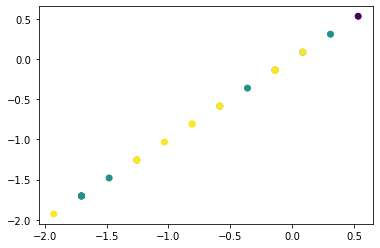

In [120]:
plt.scatter(clf1.support_vectors_[:,1], clf1.support_vectors_[:,1], c = support_pred)

In [117]:
 clf1.support_vectors_[:,0]

array([-0.86445237, -1.59583372, -0.25496781, -0.4987614 , -0.37686461,
        1.08589809,  0.11072315, -0.86445237,  0.23261995,  0.59831092,
        0.35451674,  0.8421045 , -1.10824596,  1.32969227,  0.59831092,
        0.59831092,  0.72020771,  0.59831092,  0.23261995,  0.35451674,
        0.23261995,  0.47641354,  1.69538265,  0.8421045 ,  0.11072315,
       -1.10824596])